# 직접 만들어본 머신러닝 알고리즘

- 머신러닝 알고리즘을 완벽하게 이해하기 위하여 학교수업 혹은 구글링을 바탕으로 관련 수식을 이해하고 알고리즘을 만들어 보았다.
- sikit-learn 모듈처럼 class 안에 fit, predict, score 함수를 넣어 구현하였다.
- fit(X_train, y_train) : train data를 적합시키고 모델을 만든다.
- predict(X_test) : 분류기일 경우, 예측 특성값이 들어있는 벡터를 반환한다.
- score(X_test, y_test) : 정답레이블과 예측레이블을 비교하여 정확도를 반환한다.

## 로지스틱 회귀

### 1. 알고리즘

In [42]:
import numpy as np

class logistic_regression_classifier:
    
    def __init__(self, bias = True, threshold = 0.5): # 절단값을 설정할 수 있다. 디폴트값은 0.5이다.
        self.bias = bias
        self.threshold = threshold
    
    def fit(self, X_train, y_train):
        
        if self.bias == True:
            one_vector = np.ones([len(X_train), 1])
            self.X_train = np.hstack([one_vector, X_train])            
        else:
            self.X_train = X_train        
        self.y_train = y_train
        
        mat1 = np.linalg.inv(np.dot(self.X_train.T, self.X_train)) # 일반 회귀분석 과정
        mat2 = np.dot(self.X_train.T, self.y_train)
        
        weight = np.dot(mat1, mat2)
        self.weight = weight
        
    def predict(self, X_test):
        
        if self.bias == True:
            one_vector = np.ones([len(X_test), 1])
            self.X_test = np.hstack([one_vector, X_test])
        else:
            self.X_test = X_test
        
        y_linear_pred = np.dot(self.X_test, self.weight) # 시그모이드 함수 적용
        sigmoid = lambda x : 1 / (1 + np.exp(-x))   
        y_sigmoid_pred = sigmoid(y_linear_pred)
        y_boolean_pred = y_sigmoid_pred > self.threshold
        y_pred = y_boolean_pred.astype(np.int)
        self.y_pred = y_pred
        
        return y_pred
    
    def score(self, X_test, y_test):
        
        return np.mean(self.predict(X_test) == y_test)

### 2. 검증

In [43]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples = 200, centers = 2, n_features=2, random_state=0, cluster_std = 0.4)

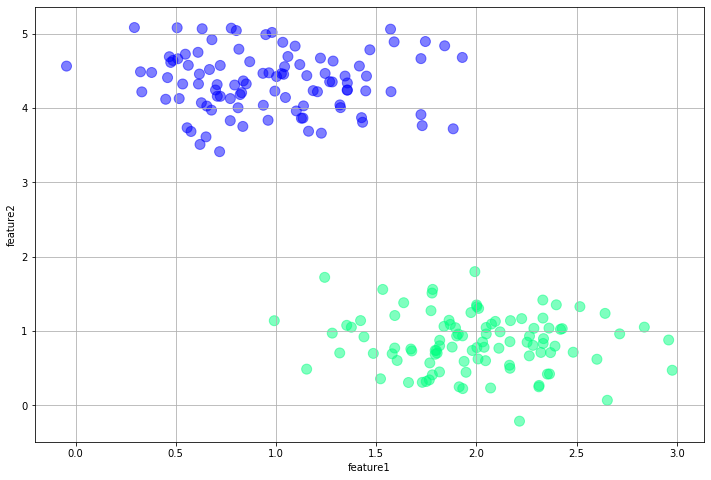

In [44]:
plt.figure(figsize = (12, 8))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'winter', s = 100, alpha = 0.5)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.grid()
plt.show()

- 위와 같은 데이터 셋을 머신러닝 모델을 이용하여 예측하고자 한다.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [46]:
lr = logistic_regression_classifier() # 위에서 만든 지도학습 알고리즘
lr.fit(X_train, y_train) # train data 적합
y_pred = lr.predict(X_test) # 예측 레이블 반환
print('예측 스코어 : ' + str(lr.score(X_test, y_test))) # 예측률 반환

예측 스코어 : 0.68


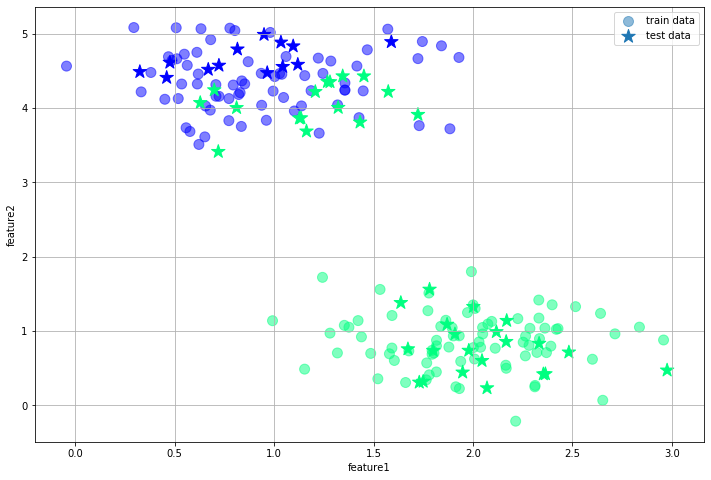

In [47]:
plt.figure(figsize = (12, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'winter', label = 'train data', s = 100, alpha = 0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred, cmap = 'winter', label = 'test data', s = 200, marker = '*')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.grid()
plt.show()

- train data는 점으로, test data는 별모양으로 표시하였다.
- 이상적인 데이터셋에서 예측률 0.8이 나왔다.
- 매개변수 threshold 값 조정으로 예측률을 높여보자

In [48]:
threshold_list = np.arange(0, 1.01, 0.01)
train_score_list = []
test_score_list = []

for threshold in threshold_list:
    lr = logistic_regression_classifier(threshold = threshold)
    lr.fit(X_train, y_train)
    train_score_list.append(lr.score(X_train, y_train))
    test_score_list.append(lr.score(X_test, y_test))

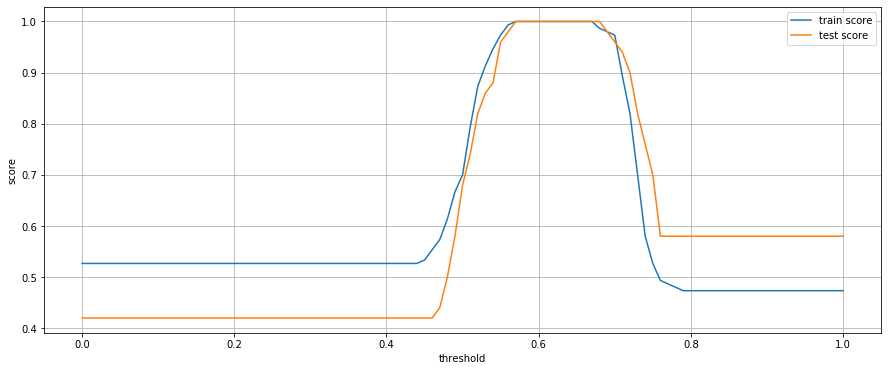

In [49]:
plt.figure(figsize = (15, 6))
plt.plot(threshold_list, train_score_list, label = 'train score')
plt.plot(threshold_list, test_score_list, label = 'test score')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.grid()

- 0.6 부근에서 train set, test set 에 대한 예측률이 1이 나온다.
- threshold = 0.6 으로 설정

In [50]:
lr = logistic_regression_classifier(threshold = 0.6) # 위에서 만든 지도학습 알고리즘
lr.fit(X_train, y_train) # train data 적합
y_pred = lr.predict(X_test) # 예측 레이블 반환
print('예측 스코어 : ' + str(lr.score(X_test, y_test))) # 예측률 반환

예측 스코어 : 1.0


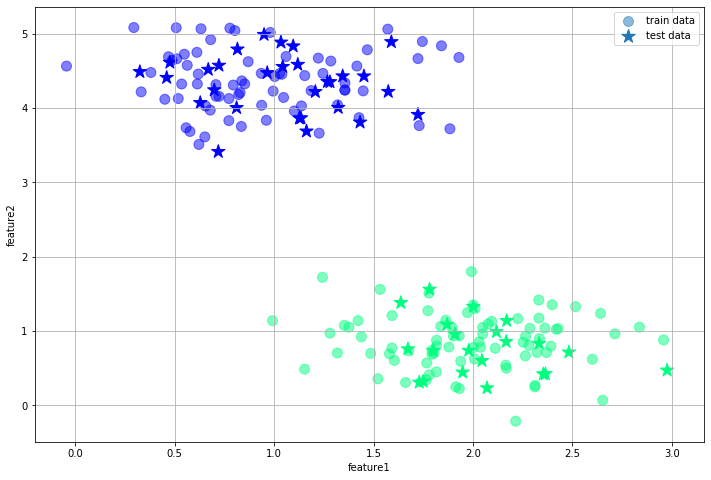

In [51]:
plt.figure(figsize = (12, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'winter', label = 'train data', s = 100, alpha = 0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred, cmap = 'winter', label = 'test data', s = 200, marker = '*')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.grid()
plt.show()

- 분류가 잘 되어진것을 확인할 수 있다.